In [3]:
# 1.

# 라이브러리 선언
import pandas as pd
import numpy as np
import warnings

# 추후 오류를 무시할 때 사용
# warnings.filterwarnings(action = "ignore")

# 데이터 불러오기
selloutData = pd.read_csv("../../dataset/join_kopo_product_volume.csv", encoding = "ms949")

In [2]:
a01Data = selloutData.loc[selloutData.REGIONID == "A01"]
a02Data = selloutData.loc[selloutData.REGIONID == "A02"]

In [11]:
# 1. 데이터 예측

# ex.
# a01지역은 통계적 예측, a02지역은 머신러닝 예측
a01Data["PREDICT"] = 10
a02Data["PREDICT"] = 30

predict_dt = pd.DataFrame([10, 15], columns = ["PREDICT_DT"])

In [12]:
# 2. 데이터 병합

# join은 키를 중심으로 묶지만, 이는 인덱스가 같은 내용끼리 붙일 수 있다.
a01Data.append(a02Data) # 혹은
pd.concat([a01Data, a02Data], axis = 0) # 0 : 축을 위아래로 합침, 1 : 좌우로 합침
pd.concat([a01Data, predict_dt], axis = 1)

# rbind (row), cbind (column) 도 있다.

,REGIONID,PRODUCT,YEARWEEK,QTY,PREDICT,PREDICT_DT
0,A01,ST0001,201901,3000,10,10
1,A01,ST0001,201902,3500,10,15


In [15]:
st01data = pd.read_csv("../../dataset/st0001data.csv")

#현재 데이터 년도의 마지막 주차정보 저장
maxDate = st01data.WEEK.max()

fcstWindow = 1000
regionid = st01data.loc[0,].REGIONID
productgroup = st01data.loc[0,].PRODUCTGROUP
columnInfo = st01data.columns

In [17]:
for i in range(0, 1000):
    #yearweek은 max 기준으로 계속 1씩 증가
    yearweek = maxDate + 1
    inDf = pd.DataFrame([[regionid, productgroup, yearweek, 0]], columns = columnInfo)
    st01data = st01data.append(inDf)

In [ ]:
# 3. 특정값으로 전체 null 값 채우기

# [dfname].fillna(0) // [dfname].fillna(method = "ffill" or "bfill")
# dataname.loc[dataname.qty.isnull()] = 0
# ffill : 앞의 값으로 따라 채움, bfill : 뒤의 값으로 따라 채움

# 다른 컬럼의 값을 끌어와서 채울수도 있다.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plt.show() 를 치지 않아도 자동으로 표를 그려줌
# 단, 위와 같은 매직명령어는 주피터에서만 쓰이므로 .py로 변환 시 주석처리 해야 함.

In [4]:
# 1. 데이터 불러오기
st01Data = pd.read_csv("../../dataset/st0001data.csv")
st02Data = pd.read_csv("../../dataset/st0002data.csv")

In [5]:
x = st01Data.WEEK
y = st01Data.MEAN_VOLUME
# 타입은 시리즈, 리스트로 해도 무방하다. 연속적인 데이터만 들고있으면 됨.

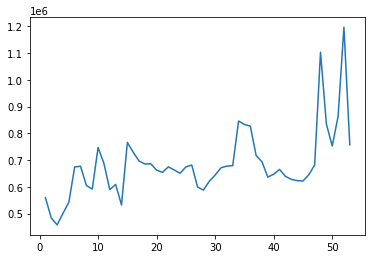

In [6]:
# 일반적인 차트 그리기
plt.plot(x, y)

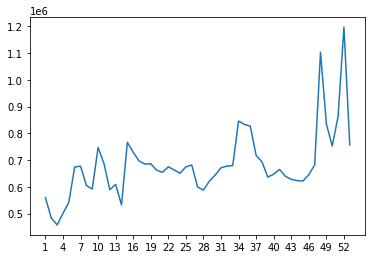

In [7]:
# x축 간격 조절해서 차트그리기
# 단, xticks 단일사용 제한
plt.xticks (range(min(x), max(x), 3))
plt.plot(x, y)

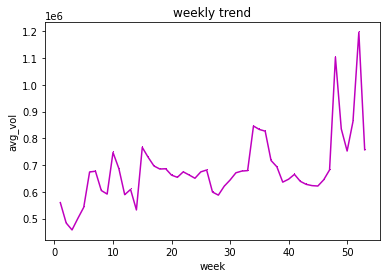

In [8]:
# x, y축 명명
plt.xlabel("week")
plt.ylabel("avg_vol")

# 제목 명명 (가급적 한글은 피할 것)
plt.title("weekly trend")

# 선색상, 종류, 굵기 변경
plt.plot(x, y, "m,-", lw=1.5)

In [9]:
# 두 개의 차트 동시에 띄우기

# 데이터 할당
x2 = st02Data.WEEK
y2 = st02Data.MEAN_VOLUME

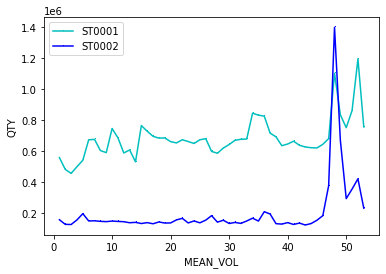

In [10]:
# 동시 선언 및 도식내용 변경
plt.xlabel("MEAN_VOL")
plt.ylabel("QTY")
plt.plot(x, y, "c,-", label = "ST0001")
plt.plot(x2, y2, "b,-", label = "ST0002")
plt.legend(loc = 0)

In [11]:
exampleData = pd.read_csv("../../dataset/feature_regression_example.csv")

In [12]:
exampleData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [15]:
finalD = exampleData.loc[exampleData.YEAR == 2015]

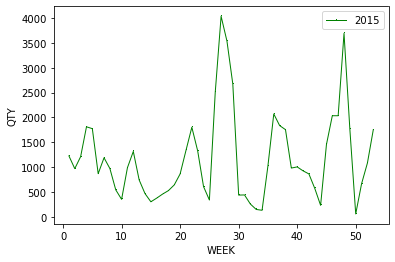

In [20]:
dtx = finalD.WEEK
dty = finalD.QTY

# 동시 선언 및 도식내용 변경
plt.xlabel("WEEK")
plt.ylabel("QTY")
plt.plot(dtx, dty, "g,-", lw = 1, label = "2015")
plt.legend(loc = 1)

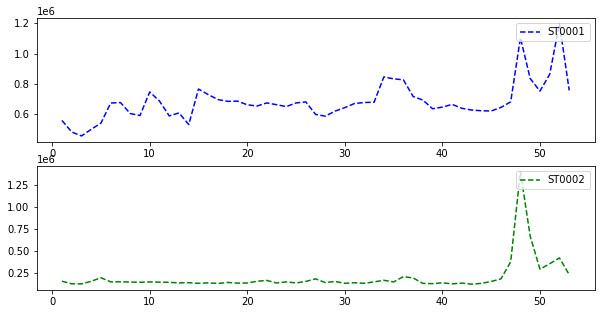

In [46]:
# 병렬로 다중 도식
fig = plt.figure(figsize = (10, 5)) # 10은 x축, 5는 y축 길이

ax1 = fig.add_subplot(2,1,1) # 1행 1열 첫번째
ax2 = fig.add_subplot(2,1,2)

ax1.plot(x, y, "b--", label = "ST0001")
ax1.legend(loc = 1)
ax2.plot(x2, y2, "g--", label = "ST0002")
ax2.legend(loc = 1)

Text(0, 0.5, 'ax2_value')

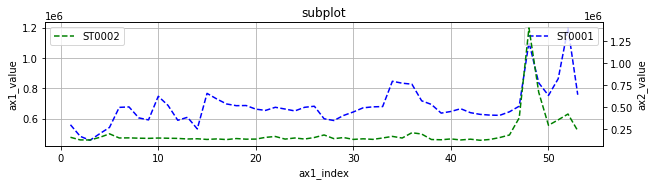

In [54]:
# 이중 도식
fig = plt.figure(figsize = (10, 5)) # 10은 x축, 5는 y축 길이

ax1 = fig.add_subplot(2,1,1) # 1행 1열 첫번째
# ax2 = fig.add_subplot(2,1,2)

ax1.plot(x, y, "b--", label = "ST0001")
ax1.legend(loc = 1)
ax1.grid(True)
ax1.set_ylabel("ax1_value")
ax1.set_xlabel("ax1_index")

plt.title("subplot")
ax2 = ax1.twinx()
ax2.plot(x, y2, "g--", label = "ST0002")
ax2.legend(loc = 2)
ax2.set_ylabel("ax2_value")

In [55]:
dataset = pd.read_csv("../../dataset/feature_regression_example.csv")
refinedData = dataset.loc[dataset.YEAR == 2015]

In [56]:
refx1 = refinedData.WEEK
refy1 = refinedData.QTY
refy2 = refinedData.PRO_PERCENT

Text(0, 0.5, 'promotion')

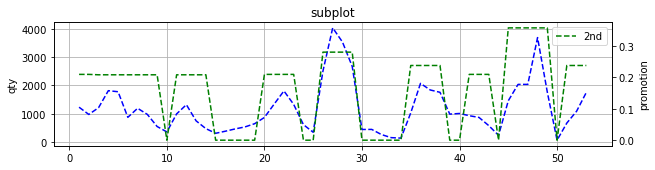

In [60]:
fig = plt.figure(figsize = (10, 5)) # 10은 x축, 5는 y축 길이

reax1 = fig.add_subplot(2,1,1) # 1행 1열 첫번째

reax1.plot(refx1, refy1, "b--")
reax1.grid(True)
reax1.set_ylabel("qty")

plt.title("subplot")
reax2 = reax1.twinx()
reax2.plot(refx1, refy2, "g--", label = "2nd")
reax2.legend(loc = 1)
reax2.set_ylabel("promotion")